
# Project: Investigate a Dataset (Replace this with something more specific!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In [4]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


UsageError: Line magic function `%` not found.


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [5]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb-movies.csv')

In [6]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [9]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


> Dataset Observation
>1. assuming budget and revenue are in US dollars.
>2. Voter rates varies in sample size with min 10 vote counts to max 9767 vote counts. This would not crate an accurate representation. Vote count and vote average should probably not be used for comparative analysis. 
>3. There are 0 values in budget, revenue, and runtime. That seems like invalid data.

### Data Cleaning (Replace this with more specific notes!)

In [7]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [8]:
#looking for duplicates in the dataset 
sum(df.duplicated())

1

> There's 1 duplicate row in this dataset and we're going to remove it.

In [10]:
#dropping duplicates
df.drop_duplicates(inplace=True)
#double checking if the duplicated row has been dropped
sum(df.duplicated())

0

> Deleting unwanted columns that doens't serve any analytical purposes

In [20]:
del_col = ['homepage', 'tagline', 'keywords', 'overview', 'vote_count', 'vote_average', 'budget_adj', 'revenue_adj']
df.drop(del_col, 1, inplace = True)

#checking if the columns have been deleted from the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 13 columns):
id                      10865 non-null int64
imdb_id                 10855 non-null object
popularity              10865 non-null float64
budget                  10865 non-null int64
revenue                 10865 non-null int64
original_title          10865 non-null object
cast                    10789 non-null object
director                10821 non-null object
runtime                 10865 non-null int64
genres                  10842 non-null object
production_companies    9835 non-null object
release_date            10865 non-null object
release_year            10865 non-null int64
dtypes: float64(1), int64(5), object(7)
memory usage: 1.2+ MB


In [22]:
#removing production comapnies as well
df.drop(['production_companies'], 1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 12 columns):
id                10865 non-null int64
imdb_id           10855 non-null object
popularity        10865 non-null float64
budget            10865 non-null int64
revenue           10865 non-null int64
original_title    10865 non-null object
cast              10789 non-null object
director          10821 non-null object
runtime           10865 non-null int64
genres            10842 non-null object
release_date      10865 non-null object
release_year      10865 non-null int64
dtypes: float64(1), int64(5), object(6)
memory usage: 1.1+ MB


In [24]:
#looking for inconsistancies in entries 
df.isnull().sum()

id                 0
imdb_id           10
popularity         0
budget             0
revenue            0
original_title     0
cast              76
director          44
runtime            0
genres            23
release_date       0
release_year       0
dtype: int64

> It seems like imdb_id, cast, director, and genres have null values
> These values must be filled to make a complete dataset.

In [25]:
df['imdb_id'].fillna('0', inplace=True)

In [36]:
df['cast'].fillna('Nan', inplace=True)
df['director'].fillna('Nan', inplace=True)
df['genres'].fillna('Nan', inplace=True)

In [39]:
#double check for null values
df.isnull().sum()

id                0
imdb_id           0
popularity        0
budget            0
revenue           0
original_title    0
cast              0
director          0
runtime           0
genres            0
release_date      0
release_year      0
dtype: int64

> Now to delete rows where budget, revenue, and runtime is equal to 0.

In [48]:
#first put the 0 in temporary dataframe
df_temp = df.loc[(df['revenue'] == 0) & (df['budget'] == 0)]

In [52]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4701 entries, 74 to 10864
Data columns (total 12 columns):
id                4701 non-null int64
imdb_id           4701 non-null object
popularity        4701 non-null float64
budget            4701 non-null int64
revenue           4701 non-null int64
original_title    4701 non-null object
cast              4701 non-null object
director          4701 non-null object
runtime           4701 non-null int64
genres            4701 non-null object
release_date      4701 non-null object
release_year      4701 non-null int64
dtypes: float64(1), int64(5), object(6)
memory usage: 477.4+ KB


In [50]:
#removing all rows where revenue and budget colums does not equal to zero
df = df.loc[(df['revenue'] != 0) & (df['budget'] != 0)]

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 10848
Data columns (total 12 columns):
id                3854 non-null int64
imdb_id           3854 non-null object
popularity        3854 non-null float64
budget            3854 non-null int64
revenue           3854 non-null int64
original_title    3854 non-null object
cast              3854 non-null object
director          3854 non-null object
runtime           3854 non-null int64
genres            3854 non-null object
release_date      3854 non-null object
release_year      3854 non-null int64
dtypes: float64(1), int64(5), object(6)
memory usage: 391.4+ KB


In [53]:
#checking for 0s in the runtime column
df[df['runtime'] == 0]

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,release_year


> We now have a clean data set with a total of 3854 entries to work with for our analysis

<a id='eda'></a>
## Exploratory Data Analysis



### Budgets, Revenue , and Profits vs Popularity

##### Research Question 1: What is the net profit for each movie?

In [63]:
#calcuating the profit for each movie
df.insert(5, 'profit', df['revenue']-df['budget'])
df.head()


,id,imdb_id,popularity,budget,revenue,profit,original_title,cast,director,runtime,genres,release_date,release_year
0,135397,tt0369610,32.985763,150000000,1513528810,1363528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,2015
1,76341,tt1392190,28.419936,150000000,378436354,228436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,2015
2,262500,tt2908446,13.112507,110000000,295238201,185238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2015
3,140607,tt2488496,11.173104,200000000,2068178225,1868178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,2015
4,168259,tt2820852,9.335014,190000000,1506249360,1316249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,4/1/15,2015


> Comparing popularity rate between low profit movies vs high profit movies

In [128]:
def pop_high_low_bar (columns):
    med = df[columns].median()
    low = df.query(f'{columns} < {med}')
    high = df.query(f'{columns} >= {med}')
    
    avg_high = high[columns].mean()
    avg_low = low[columns].mean()
    print (f'The medium {columns} is {med}')
    print (f'The average {columns} in the high group is {avg_high}')
    print (f'The average {columns} in the low group is {avg_low}')
    
    p_mean_pop_low = low_prof['popularity'].mean()
    p_mean_pop_high = high_prof['popularity'].mean()
    
    locations = [1, 2]
    heights = [p_mean_pop_low, p_mean_pop_high]
    labels = ['Low', 'High']
    plt.bar(locations, heights, tick_label=labels)
    plt.title(f'Average Popularity Ratings by {columns}')
    plt.xlabel(f'{columns}')
    plt.ylabel('Average Popularity Rating');

##### Research Question 2: What is the corrolation between profit and popularity rating?

The medium profit is 20020190.0
The average profit in the high group is 145157228.32797095
The average profit in the low group is -4191390.041515309


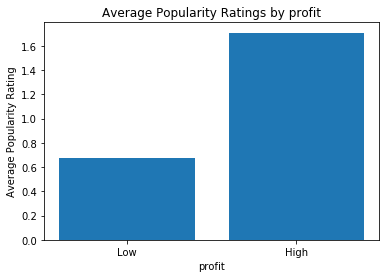

In [129]:
pop_high_low_bar('profit')

> This graph shows that the more profit the movie made, the high the popularity of the movies and vise versa
> This is kind of a given, but good to check to validate your data. This is an easy way of testing out if the data makes sense by testing out obvious hypothesis. 

##### Research Question 3: what is the corrolation between budget and popularity rating?

The medium budget is 24000000.0
The average budget in the high group is 64090112.30959752
The average budget in the low group is 10008564.931106472


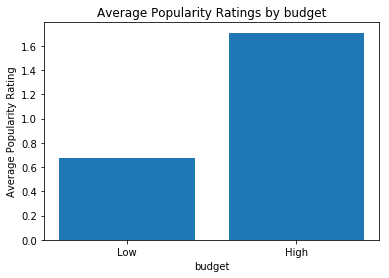

In [130]:
pop_high_low_bar('budget')

> This graph shows that the more budget spent on a film, the popular the film will be.

##### Research Question 4: What is the corrolation between revenue and popularity rating?

The medium revenue is 44800002.5
The average revenue in the high group is 199216644.88012454
The average revenue in the low group is 16156587.316035287


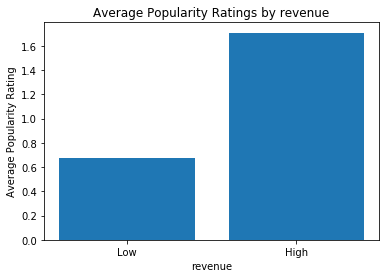

In [131]:
pop_high_low_bar('revenue')

> The more money the film makes, the more popular the film is.

##### Research Question 5: what is the corrolation between runtime and popularity rating?

The medium runtime is 106.0
The average runtime in the high group is 123.75259336099585
The average runtime in the low group is 94.67289719626169


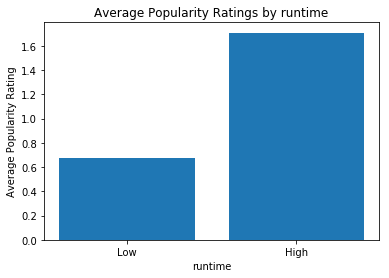

In [132]:
pop_high_low_bar('runtime')

> The longer the film the higher the popularity.

##### Research Question 6: What is the most and leaset profitable movie?

In [85]:
def most_least(columns):
    mn = df[columns].min()
    mx = df[columns].max()
    
    return df.loc[(df[columns] == mn) | (df[columns] == mx)]

In [86]:
#Which film produced the most profit and the least profit?
most_least('profit')

,id,imdb_id,popularity,budget,revenue,profit,original_title,cast,director,runtime,genres,release_date,release_year
1386,19995,tt0499549,9.432768,237000000,2781505847,2544505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,162,Action|Adventure|Fantasy|Science Fiction,12/10/09,2009
2244,46528,tt1032751,0.250540,425000000,11087569,-413912431,The Warrior's Way,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,Sngmoo Lee,100,Adventure|Fantasy|Action|Western|Thriller,12/2/10,2010


> The Film 'Avatar' had the most profit and 'The Warrior's Way' had the least profit. 

##### Research Question 7: What is the highest and lowest budget movie?

In [87]:
most_least('budget')

,id,imdb_id,popularity,budget,revenue,profit,original_title,cast,director,runtime,genres,release_date,release_year
2244,46528,tt1032751,0.250540,425000000,11087569,-413912431,The Warrior's Way,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,Sngmoo Lee,100,Adventure|Fantasy|Action|Western|Thriller,12/2/10,2010
2618,39964,tt0120836,0.090186,1,100,99,Lost & Found,David Spade|Sophie Marceau|Ever Carradine|Step...,Jeff Pollack,95,Comedy|Romance,4/23/99,1999
3581,59296,tt1436559,0.520430,1,1378,1377,"Love, Wedding, Marriage",Mandy Moore|Kellan Lutz|Jessica Szohr|Autumn F...,Dermot Mulroney,90,Comedy|Romance,6/3/11,2011


> The film with the highest budget is 'The Warrior's Way' and the lowest budget was 'Lost & Found' and 'Love, Wedding, Marriage'. 
> It's interesting to see that the film with the highest budget is also the film with the lowest profit.

##### Research Question 8: What is the highest and lowest revenue movie?

In [88]:
most_least('revenue')

,id,imdb_id,popularity,budget,revenue,profit,original_title,cast,director,runtime,genres,release_date,release_year
1386,19995,tt0499549,9.432768,237000000,2781505847,2544505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,162,Action|Adventure|Fantasy|Science Fiction,12/10/09,2009
5067,13537,tt0323944,0.462609,6000000,2,-5999998,Shattered Glass,Hayden Christensen|Peter Sarsgaard|ChloÃ« Sevi...,Billy Ray,94,Drama|History,11/14/03,2003
8142,2293,tt0113749,0.552091,6000000,2,-5999998,Mallrats,Jason Lee|Jeremy London|Shannen Doherty|Claire...,Kevin Smith,94,Romance|Comedy,10/20/95,1995


##### Research Question 9: What is the corrolation between release year and popularity?

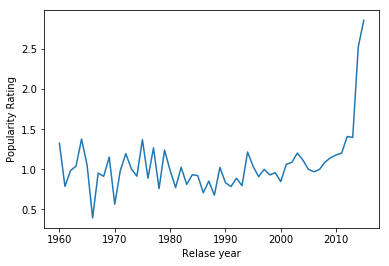

In [105]:
pop_yr = df.groupby('release_year')['popularity'].mean()

plt.xlabel('Relase year')
plt.ylabel('Popularity Rating')
plt.plot(pop_yr)

##### Research Question 10: What is the corrolation between release year and profit?

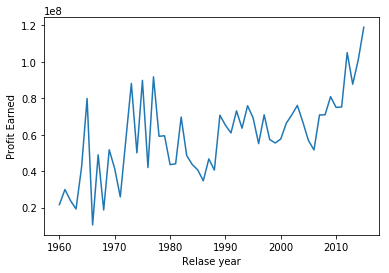

In [106]:
pop_prof = df.groupby('release_year')['profit'].mean()

plt.xlabel('Relase year')
plt.ylabel('Profit Earned')
plt.plot(pop_prof)

> Seems that movies are getting more and more popular and profitable.
> Shows that the movie industry has been growing through the decades.

#### Research Question 11: What is the corroation between budget, revenue, and profit throughout the years? 

In [197]:
budget_yr2 =  df.groupby('release_year')['budget', 'revenue', 'profit'].mean()


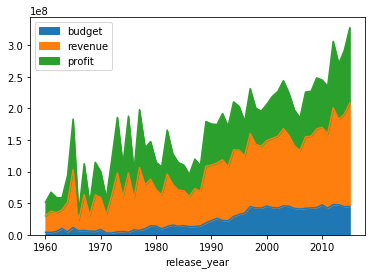

In [198]:
budget_yr2.plot.area()

> This analysis shows that the movie industry has become more and more profitable through the years. The budget for each movie has gone up on avg, but so has the revenue per movie and the profit. 
> More people are watching movies and spending more money watching movies in 2010 than they were in 1960.
> This graph represent the growth of the movie industry.

##### Research Question 12: What genre produces the most popularity rating? 

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 10848
Data columns (total 13 columns):
id                3854 non-null int64
imdb_id           3854 non-null object
popularity        3854 non-null float64
budget            3854 non-null int64
revenue           3854 non-null int64
profit            3854 non-null int64
original_title    3854 non-null object
cast              3854 non-null object
director          3854 non-null object
runtime           3854 non-null int64
genres            3854 non-null object
release_date      3854 non-null object
release_year      3854 non-null int64
dtypes: float64(1), int64(6), object(6)
memory usage: 581.5+ KB


In [166]:
#in order to get the avg popular rating of each genre, we're going to create a separate dataset 
#this dataset will only represent movies in the highest group
#where budget >= 64090112 , which is the avg high budget from the graph above
#where revenue rating >= 199216644
#where profit >= 145157228
#where runtime >= 123

gen_pop = df.loc[(df['budget'] >= 64090112) | (df['revenue'] == 199216644) |
       (df['profit'] >= 145157228) | (df['runtime'] >= 123)]


In [167]:
#this function will split the genres and copy its popularity rating
def splitdf(df):
    s = df["genres"].str.split('|', expand=True).stack()
    i = s.index.get_level_values(0)
    df2 = df.loc[i].copy()
    df2["genres"] = s.values
    return df2

In [168]:
gen_pop_normalized = splitdf(gen_pop)

In [169]:
gen_pop_normalized.tail()

,id,imdb_id,popularity,budget,revenue,profit,original_title,cast,director,runtime,genres,release_date,release_year
10835,5923,tt0060934,0.299911,12000000,20000000,8000000,The Sand Pebbles,Steve McQueen|Richard Attenborough|Richard Cre...,Robert Wise,182,Action,12/20/66,1966
10835,5923,tt0060934,0.299911,12000000,20000000,8000000,The Sand Pebbles,Steve McQueen|Richard Attenborough|Richard Cre...,Robert Wise,182,Adventure,12/20/66,1966
10835,5923,tt0060934,0.299911,12000000,20000000,8000000,The Sand Pebbles,Steve McQueen|Richard Attenborough|Richard Cre...,Robert Wise,182,Drama,12/20/66,1966
10835,5923,tt0060934,0.299911,12000000,20000000,8000000,The Sand Pebbles,Steve McQueen|Richard Attenborough|Richard Cre...,Robert Wise,182,War,12/20/66,1966
10835,5923,tt0060934,0.299911,12000000,20000000,8000000,The Sand Pebbles,Steve McQueen|Richard Attenborough|Richard Cre...,Robert Wise,182,Romance,12/20/66,1966


In [177]:
#now I can groupby and get the count of each genres
#this analysis will show what genre the top rated movies are
gen_pop2 = gen_pop_normalized.groupby('genres')['popularity'].count()

In [207]:
gen_pop2.sort_values(ascending = False).head()

genres
Drama        657
Action       511
Adventure    428
Thriller     392
Comedy       379
Name: popularity, dtype: int64

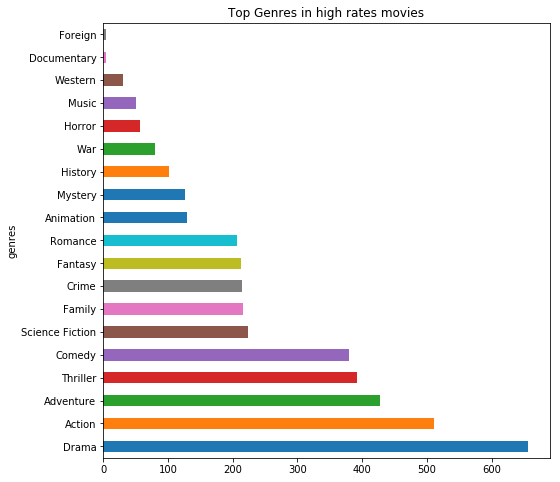

In [211]:
gen_pop2.plot(kind = 'barh', figsize = (8,8), title ='Top Genres in high rates movies')

> You can conclude that the top 5 genres are drama, action, adventure, thriller, and Comedy.

#####  Research Question 13: What cast produces the most popularity rating? 

In [184]:
#we'll use the same data set as gen_pop and split by cast
def splitdf_cas(df):
    s = df["cast"].str.split('|', expand=True).stack()
    i = s.index.get_level_values(0)
    df2 = df.loc[i].copy()
    df2["cast"] = s.values
    return df2

In [185]:
cast_pop = splitdf_cas(gen_pop)

In [186]:
cast_pop2 = cast_pop.groupby('cast')['popularity'].count()

In [188]:
cast_pop2.sort_values(ascending = False).head()

cast
Tom Cruise        28
Brad Pitt         27
Robert De Niro    26
Tom Hanks         26
Bruce Willis      26
Name: popularity, dtype: int64

> You can conclude that the cast: Tom Cruise, Brad Pitt, Robert De Niro, Tom Hankds, and Bruce Willis are in the top most popular movies.

<a id='conclusions'></a>
## Conclusions

What does it take for a movie to be successful? 
1. Have an average budget of 64 million dollars.
2. The length of your movie should be on average 123 minutes.
3. Cast one or all of these actors: Tom Cruise, Brad Pitt, Robert De Niro, Tom Hanks, or Bruce Willis.
4. Make a movie in one or all of the genre: Drama, Action, Adventure, Thriller, or Comedy.
5. The movie industry is growing and has proven to be a profitable industry through the decades.

>Limitations:
>The units are an assumption since there's no indication of units in the dataset. 
>The accuracy of the data is solely dependent on the provider.  
>Data points that wer dropped due to insufficient data and null values could potentially have a skewed effect on the overall dataset.

## Resources

https://stackoverflow.com/questions/28931224/adding-value-labels-on-a-matplotlib-bar-chart
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.max.html
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html
https://stackoverflow.com/questions/40045545/pandas-query-string-where-column-name-contains-special-characters
https://stackoverflow.com/questions/22649693/drop-rows-with-all-zeros-in-pandas-data-frame
https://stackoverflow.com/questions/33622470/fast-way-to-split-column-into-multiple-rows-in-pandas
https://stackoverflow.com/questions/2225995/how-can-i-create-stacked-line-graph-with-matplotlib